# Image Processing with Convolutional Neural Networks

<i>Handwritten Digit Recognition involves transforming images of human-written digits into digital representations. This task presents a notable challenge for machines due to the inherent imperfections and variability in handwritten digits. To tackle this challenge, we introduced HDR, an approach that utilizes digit images to identify the depicted digit accurately. In our project, we developed a Convolutional Neural Network (CNN) model using the Tensorflow framework specifically designed for recognizing handwritten digits.</i>

## Import Libraries <a class="anchor" id="library"></a>

In [1]:
# !pip install tensorflow

In [2]:
# !pip install seaborn==0.13.2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')

## Load Dataset

In [4]:
train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [5]:
train.shape

(42000, 785)

In [6]:
X_test.shape

(28000, 784)

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2>Data overview</h2>
<a id="overview"></a>

<h3> Quick View </h3>
<a id="quick_view"></a>

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [11]:
train.isnull().sum().sum()

0

In [12]:
X_test.isnull().sum().sum()

0

In [13]:
train.duplicated().sum()

0

In [14]:
X_test.duplicated().sum()

0

<h5><b><i>Note: There are no null values or duplicates.</i></b></h5>

<h3>Visualize Target Variable</h3>
<a id="target_visualize"></a>

In [15]:
train['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

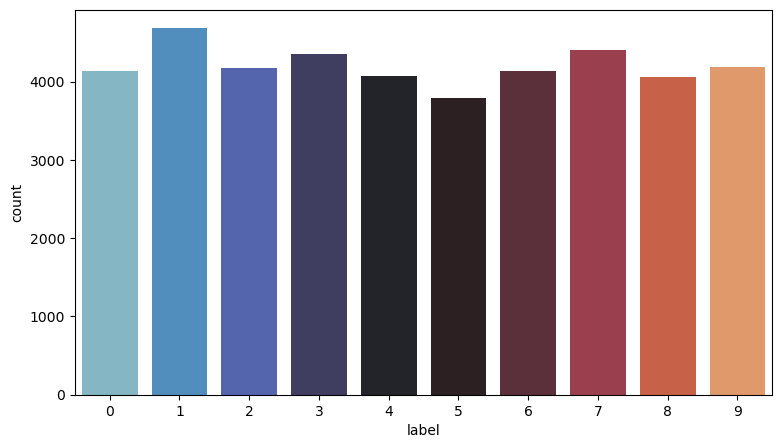

In [16]:
plt.figure(figsize=(9, 5))
sns.countplot(data = train, x = 'label',  palette="icefire")

<h5><b><i>Note: The target variable is balanced.</i></b></h4>

<h3> Visualize Features Variables</h3>
<a id="feature_visualize"></a>

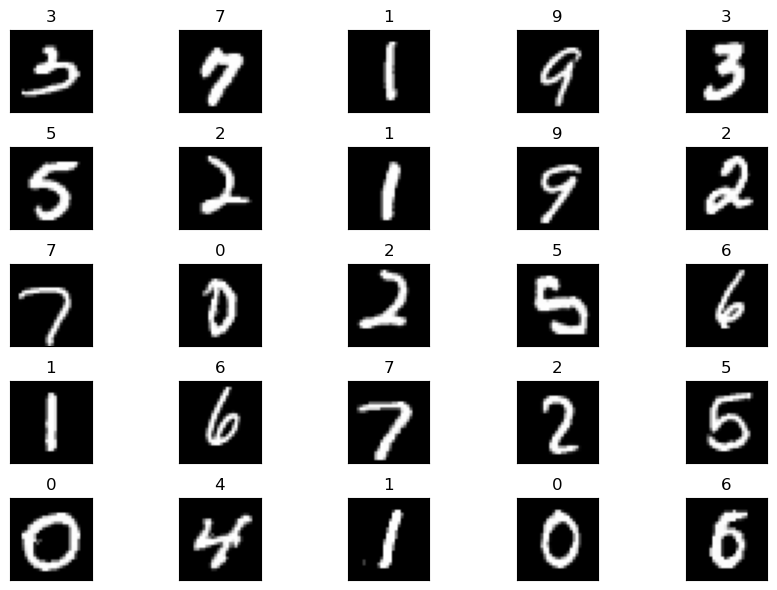

In [17]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 6))

df = train.sample(frac = 1).reset_index(drop=True)
feature = df.drop('label', axis=1)
label = df['label']

for i in range(numbers_to_display):
    
    image = feature.iloc[i].to_numpy()
    image = image.reshape((28,28))

    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.title(label[i])
    plt.tight_layout()

plt.show()

<h2>Data Preprocessing</h2>
<a id="preprocessing"></a>

<h3>Split Train  and Test</h3> 
<a id="split"></a>
<ul>
    <li>The data is shuffled and splitted into train and test data.</li>
    <li>The test data is 20% of train dataset.</li>
    <li>The train data is 80% of train dataset.</li>
</ul>

In [18]:
X = train.drop('label', axis=1)
y = train['label']

In [19]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=2)

<h3> Data Reshape</h3>
<a id="reshape"></a>
<ul>
    <li>Train and test images (28 x 28)</li>
    <li>The all data is reshaped to 28x28x1 which is 3D matrices.</li>
    <li>The images are grayscale, so they only utilize one channel which Keras requires the additional dimension at the end.
</li>
<uol>

In [20]:
X_train = X_train.values.reshape(-1,28,28,1)
X_validation = X_validation.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [21]:
X_train.shape

(33600, 28, 28, 1)

In [22]:
X_validation.shape

(8400, 28, 28, 1)

In [23]:
X_test.shape

(28000, 28, 28, 1)

<h3> Label One-Hot-Encoding</h3>
<a id="encoding"></a>
Labels are encoded to a single hot vector.
<ul>
    <li>1 => [0,1,0,0,0,0,0,0,0,0]</li>
    <li>5 => [0,0,0,0,0,1,0,0,0,0]</li>
    <li>9 => [0,0,0,0,0,0,0,0,0,1]</li>
</ul>

In [24]:
y_train = to_categorical(y_train, num_classes = 10)
y_validation = to_categorical(y_validation, num_classes = 10)

In [25]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
y_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

<h2> Data Normalization</h2>
<a id="normalization"></a>

<li>The normalization make performance of the machine learning model faster</li>

In [27]:
X_train = X_train/255.0
X_validation = X_validation/255.0
X_test = X_test / 255.0

<h2> Convolutional Neural Network Model </h2>
<a id="model"></a>

In [28]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<h3> Optimize and Compile the Model </h3>

In [29]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [30]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy",  metrics=["accuracy"])

In [31]:
epochs = 25  # for better result increase the epochs
batch_size = 250

<h3> Image Data Generator </h3>

<li>The handwritten digit dataset needs to be artificially expanded in order to prevent the overfitting issue.</li>

In [32]:
# randomly rotate images in the range 5 degrees, zoom image 10%, shift images horizontally 10%, shift images vertically 10%
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=5, 
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

<h3> History of the Model</h3>

In [33]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_validation, y_validation), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4483 - loss: 1.5911 - val_accuracy: 0.9370 - val_loss: 0.2398
Epoch 2/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8240 - loss: 0.5174 - val_accuracy: 0.9361 - val_loss: 0.2398
Epoch 3/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.8394 - loss: 0.5096 - val_accuracy: 0.9582 - val_loss: 0.1374
Epoch 4/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8720 - loss: 0.3436 - val_accuracy: 0.9583 - val_loss: 0.1375
Epoch 5/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.8905 - loss: 0.3435 - val_accuracy: 0.9670 - val_loss: 0.1077
Epoch 6/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9240 - loss: 0.3234 - val_accuracy: 0.9663 - val_loss: 0.1092
Epoch 7/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.9119 - loss: 0.2805 - val_accuracy: 0.9743 - val_loss: 0.0881
Epoch 8/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9280 - loss: 0.2484 - val_ac

<h3> Summary of the Model</h3>

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 614,720 (2.34 MB)

 Trainable params: 204,906 (800.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 409,814 (1.56 MB)

<h3> Save of the Model </h3>

In [35]:
model.save('model.h5', save_format='h5')

<h3> Evaluate of the Model </h3>

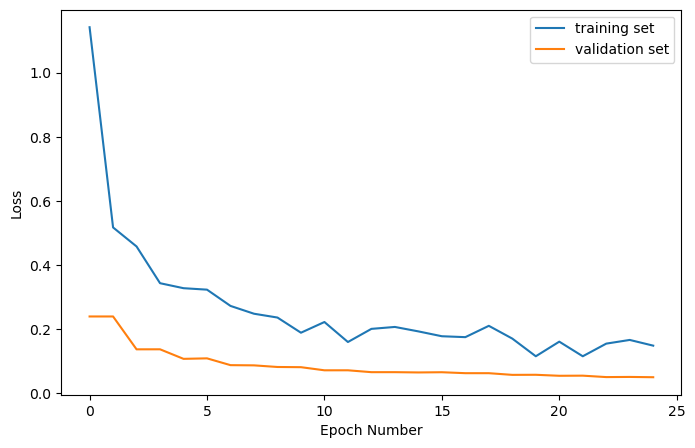

In [36]:
plt.subplots(figsize=(8, 5))
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
plt.legend()

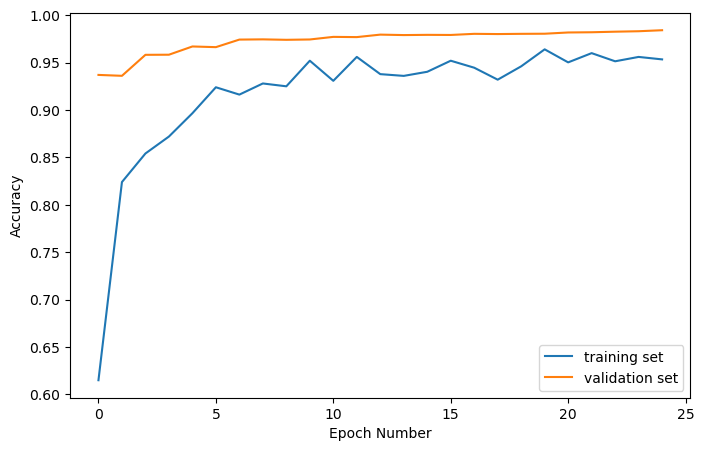

In [37]:
plt.subplots(figsize=(8, 5))
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='validation set')
plt.legend()

In [38]:
y_pred = model.predict(X_validation)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
y_pred = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(y_validation, axis = 1) 

In [40]:
confusion_matrix = confusion_matrix(y_true, y_pred)

In [41]:
classification_report = classification_report(y_true, y_pred)

In [42]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       821
           1       0.99      0.99      0.99       962
           2       0.99      0.98      0.99       829
           3       0.99      0.99      0.99       864
           4       0.99      0.99      0.99       856
           5       0.99      0.98      0.98       729
           6       0.98      1.00      0.99       839
           7       0.97      0.99      0.98       873
           8       0.98      0.97      0.98       793
           9       0.97      0.97      0.97       834

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



<Axes: >

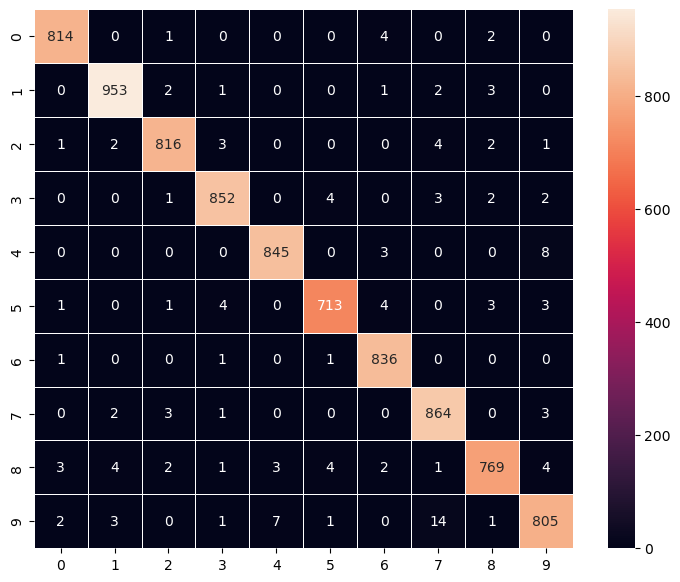

In [43]:
plt.subplots(figsize=(9, 7))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt="d", square=True,)

In [44]:
score = accuracy_score(y_true, y_pred)

In [45]:
score

0.9841666666666666

<h3> Test Model Prediction on Unseen Dataset </h3>

In [46]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model.h5')

predictions_test = loaded_model.predict([X_test])

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [47]:
predictions_test.shape

(28000, 10)

In [48]:
y_test = np.argmax(predictions_test, axis=1)

In [49]:
y_test

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

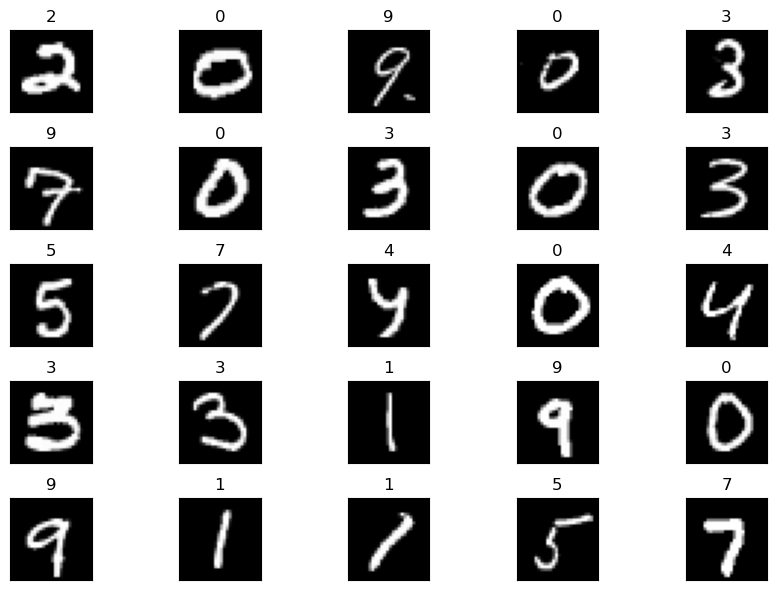

In [50]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 6))

for i in range(numbers_to_display):
    
    image = X_test[i]
    image = image.reshape((28,28))
    
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.title(y_test[i])
    plt.tight_layout()

plt.show()